In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

df = pd.read_csv(url)

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


### Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [7]:
def get_lower_and_upper_bounds(series, df, multiplier=1.5):
    '''
    This function takes in a series and a multiplier and returns series items that are greater than the multiplier
    times the interquartile range above the 75th percentile and less than the multiplier times the interquartile range
    below the 25th percentile
    '''
    # get value at the 25th percentile
    q1 = df[series].quantile(0.25)
    # get value at the 75th percentile
    q3 = df[series].quantile(0.75)
    # calculate interquartile range
    iqr = q3 - q1
    # calculate upper and lower limits for the whiskers
    lower_limit = q1 - (multiplier * iqr)
    upper_limit = q3 + (multiplier * iqr)
    # get outliers outside this range
    upper_outliers = df[(df[series] > upper_limit)]
    lower_outliers = df[(df[series] < lower_limit)]
    
    return upper_outliers, lower_outliers

### Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [8]:
# loop through columns and for each column that is not object datatype use function to get outliers
for col in df.columns: 
    if df[col].dtype != 'object': 
        upper_outliers, lower_outliers = get_lower_and_upper_bounds(col, df=df, multiplier=1.5)
        print(col) 
        print(lower_outliers) 
        print('-------------------') 

Temperature
         Date     Day  Temperature  Rainfall  Flyers  Price  Sales
364  12/31/17  Sunday         15.1       2.5       9    0.5      7
-------------------
Rainfall
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
-------------------
Flyers
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20
-------------------
Price
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
-------------------
Sales
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
-------------------


The temperature outlier makes sense. The number of flyers does not make sense so is likely a typo and should be 38. Rainfall, price, and sales do not have any lower outliers.


### Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [9]:
# loop through columns and for each column that is not object datatype use function to get outliers
for col in df.columns: 
    if df[col].dtype != 'object': 
        upper_outliers, lower_outliers = get_lower_and_upper_bounds(col, df=df, multiplier=1.5)
        print(col) 
        print(upper_outliers) 
        print('-------------------') 

Temperature
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21
-------------------
Rainfall
         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1/7/17   Saturday         32.9      1.54      19    0.5     13
10    1/11/17  Wednesday         32.6      1.54      23    0.5     12
11    1/12/17   Thursday         38.2      1.33      16    0.5     14
12    1/13/17     Friday         37.5      1.33      19    0.5     15
15    1/16/17     Monday         30.6      1.67      24    0.5     12
16    1/17/17    Tuesday         32.2      1.43      26    0.5     14
19    1/20/17     Friday         31.6      1.43      20

The rainfall does not seem unusual

### Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [10]:
# loop through columns and for each column that is not object datatype use function to get outliers
for col in df.columns: 
    if df[col].dtype != 'object': 
        upper_outliers, lower_outliers = get_lower_and_upper_bounds(col, df=df, multiplier=3)
        print(col) 
        print(lower_outliers) 
        print('-------------------') 

Temperature
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
-------------------
Rainfall
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
-------------------
Flyers
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20
-------------------
Price
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
-------------------
Sales
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
-------------------


The only outlier with a multiplier of 3 is -38 fliers 

### Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [11]:
# loop through columns and for each column that is not object datatype use function to get outliers
for col in df.columns: 
    if df[col].dtype != 'object': 
        upper_outliers, lower_outliers = get_lower_and_upper_bounds(col, df=df, multiplier=3)
        print(col) 
        print(upper_outliers) 
        print('-------------------') 

Temperature
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21
-------------------
Rainfall
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17   Sunday         27.0      2.00      15    0.5     10
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10
343  12/10/17   Sunday         31.3      1.82      15    0.5     11
364  12/31/17   Sunday         15.1      2.50       9    0.5      7
-------------------
Flyers
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
-------------------
Price
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
-------------------
Sales
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
181  7/1/17  Saturday        102.9      0.47      59    0.5    143
182  7/2/17    Sunday         93.4      0.51      68    0.5    158
183  7/3/17    Monday

I would keep all of these other than the temperature

### Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

Use a 2 sigma decision rule to isolate the outliers.

Do these make sense?
Should certain outliers be kept or removed?

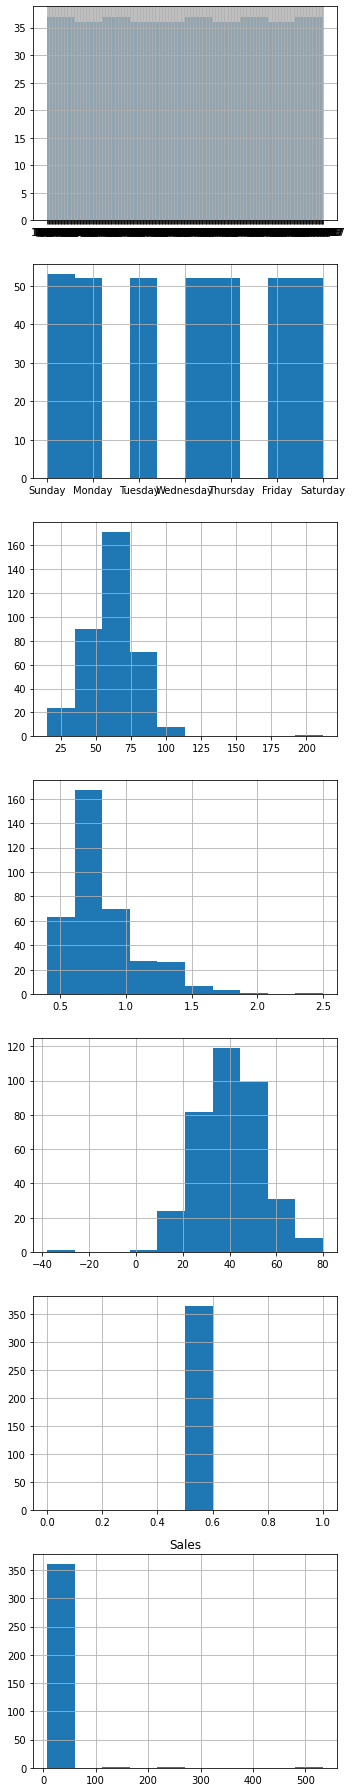

In [12]:
# plot histograms for each of the columns
fig, axs = plt.subplots(len(df.columns), figsize=(5, 25))
for n, col in enumerate(df.columns):
    df[col].hist(ax=axs[n])
    plt.title(col)
    plt.tight_layout()

In [13]:
# create z-scores for all numeric columns
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[f'{col}_zscore'] = (df[col] - df[col].mean()) / df[col].std()

In [14]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Price_zscore,Sales_zscore
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,NaN,-0.577281
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.787286,1.840253,-1.820927,NaN,-0.480344
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.477652,1.840253,-0.950507,NaN,-0.415720
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.946852,0.817946,-0.877972,NaN,-0.351096
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.040848,0.635391,-0.515297,NaN,-0.318783


In [15]:
df[df['Temperature_zscore'] >= 2]


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Price_zscore,Sales_zscore
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627,0.306792,-0.370227,NaN,-0.221847
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.105251,-1.299691,2.676244,NaN,0.424395
176,6/26/17,Monday,102.6,0.47,60,0.5,42,2.287714,-1.299691,1.443149,NaN,0.456708
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301,-1.299691,1.370614,NaN,3.720233
190,7/10/17,Monday,98.0,0.49,66,0.5,40,2.033372,-1.226669,1.878359,NaN,0.392083
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.105251,-1.299691,2.603709,NaN,0.424395
202,7/22/17,Saturday,99.6,0.47,49,0.5,42,2.121838,-1.299691,0.645264,NaN,0.456708
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.027843,-1.299691,2.458639,NaN,0.489020


In [17]:
from scipy.stats import zscore
# use assign to create new columns with the zscores for each of the normally distributed columns
df = df.assign(temp_zscore = zscore(df.Temperature), 
               rain_zscore = zscore(df.Rainfall), 
               flyers_zscore = zscore(df.Flyers))
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Price_zscore,Sales_zscore,temp_zscore,rain_zscore,flyers_zscore
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,NaN,-0.577281,-1.894938,4.292372,-1.823427
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.787286,1.840253,-1.820927,NaN,-0.480344,-1.789739,1.842779,-1.823427
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.477652,1.840253,-0.950507,NaN,-0.415720,-1.479680,1.842779,-0.951812
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.946852,0.817946,-0.877972,NaN,-0.351096,-0.948151,0.819069,-0.879177
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.040848,0.635391,-0.515297,NaN,-0.318783,-1.042276,0.636263,-0.516004


In [18]:
df[abs(df.temp_zscore) > 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Price_zscore,Sales_zscore,temp_zscore,rain_zscore,flyers_zscore
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627,0.306792,-0.370227,NaN,-0.221847,8.348071,0.307213,-0.370735


In [19]:
df[abs(df.rain_zscore) > 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Price_zscore,Sales_zscore,temp_zscore,rain_zscore,flyers_zscore
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,NaN,-0.577281,-1.894938,4.292372,-1.823427
15,1/16/17,Monday,30.6,1.67,24,0.5,12,-1.693290,3.081626,-1.168112,NaN,-0.512656,-1.695614,3.085856,-1.169715
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291,-2.111067,NaN,-0.577281,-2.171776,3.634273,-2.113965
343,12/10/17,Sunday,31.3,1.82,15,0.5,11,-1.654586,3.629291,-1.820927,NaN,-0.544968,-1.656857,3.634273,-1.823427
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.550311,6.112037,-2.256137,NaN,-0.674217,-2.553812,6.120427,-2.259234


In [20]:
df[abs(df.flyers_zscore) > 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Price_zscore,Sales_zscore,temp_zscore,rain_zscore,flyers_zscore
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,-0.786506,0.452836,-5.665283,NaN,-0.254159,-0.787585,0.453458,-5.67306


In [24]:
import itertools

In [25]:
itertools.product(['x','y'],['50%','mean'])

In [ ]:
list(itertools.product(["A", "B"], ["X", "Y"]))